In [2]:
import os
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 중인 Notebook의 경로 가져오기
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../utils")))
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../../../class")))

from data import preprocess_data

from Train import Train

# 실험 설정
csv_path = "../../../Data/font_data.csv"

train_instance = Train(
    epoch=20,
    batch=10,
    activation="relu",
    output_activation="softmax",
    weight_init="He",
    optimizer="adam",
    dropout=0.5,
    learning_rate=0.001,
)

# 데이터 로드
inputs, targets_one_hot, targets = train_instance.load_data(csv_path)

# K-Fold Cross Validation 준비
folds = train_instance.k_fold_split(inputs, targets_one_hot)
# print(folds)
# 학습 실행
for i, (X_train, y_train, X_val, y_val) in enumerate(folds):
    print(f"Fold {i + 1}/{len(folds)}")
    train_instance.train(X_train, y_train, X_val, y_val)



Fold 1/5
Epoch 1/20, Loss: 2397460.298701299, Accuracy: 0.008116883116883116, Val Loss: 2375937.974025974, Val Accuracy: 0.006493506493506494
Epoch 2/20, Loss: 2397460.298701299, Accuracy: 0.008116883116883116, Val Loss: 2375394.0, Val Accuracy: 0.006493506493506494
Epoch 3/20, Loss: 2397460.298701299, Accuracy: 0.008116883116883116, Val Loss: 2382259.051948052, Val Accuracy: 0.006493506493506494
Epoch 4/20, Loss: 2397460.298701299, Accuracy: 0.008116883116883116, Val Loss: 2382259.051948052, Val Accuracy: 0.006493506493506494
Epoch 5/20, Loss: 2397460.298701299, Accuracy: 0.008116883116883116, Val Loss: 2382259.051948052, Val Accuracy: 0.006493506493506494
Epoch 6/20, Loss: 2399620.1233766233, Accuracy: 0.008116883116883116, Val Loss: 2382259.051948052, Val Accuracy: 0.006493506493506494
Epoch 7/20, Loss: 2399484.1298701297, Accuracy: 0.008116883116883116, Val Loss: 2382259.051948052, Val Accuracy: 0.006493506493506494
Epoch 8/20, Loss: 2399484.1298701297, Accuracy: 0.0081168831168831

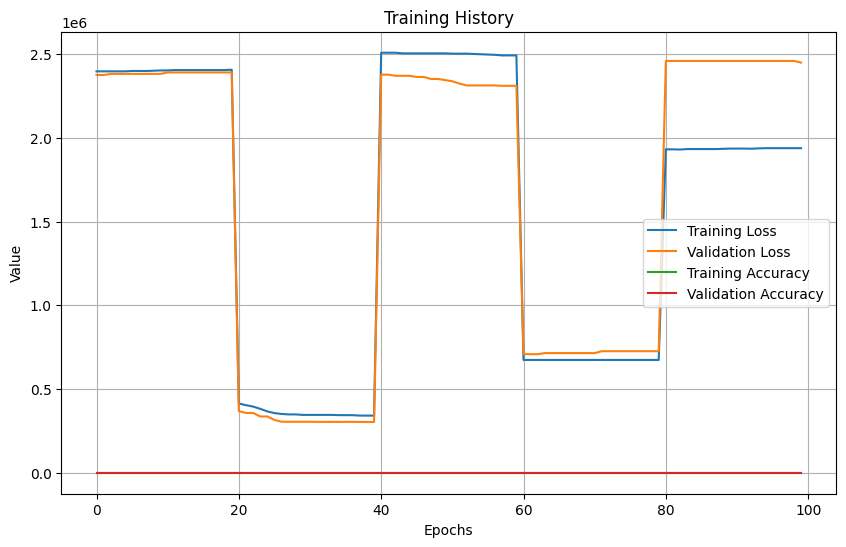

In [3]:

# 결과 저장 및 시각화
train_instance.save_results()
train_instance.plot_history()